In [268]:
num_qubits = 13
qpu_sizes = [5,5,5]


assignment = []

for qpu in range(len(qpu_sizes)):
    for q in range(qpu_sizes[qpu]):
        assignment.append(qpu)

print(assignment)


assignment1 = assignment[0:num_qubits]

print(assignment1)

import numpy as np



# assignment2 = np.random.permutation(assignment)[:num_qubits].tolist()


assignment2 = np.array(assignment1).copy()

assignment2[0] = 2

assignment2[6] = 2

assignment2[1] = 1

print(assignment2)


def space_count(assignment, qpu_sizes):
    return [qpu_sizes[p] - len(list(filter(lambda x: x == p, assignment))) for p in range(len(qpu_sizes))]


space_count1 = space_count(assignment1, qpu_sizes)
space_count2 = space_count(assignment2, qpu_sizes)

print(space_count1)
print(space_count2)




[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2]
[2 1 0 0 0 1 2 1 1 1 2 2 2]
[0, 0, 2]
[2, 0, 0]


In [269]:
import networkx as nx
import matplotlib.pyplot as plt

def extract_cycles_and_edges(G: nx.MultiDiGraph) -> tuple[list[tuple], dict[tuple, list[tuple]], list[tuple]]:
    cycles = []
    for cycle_nodes in nx.simple_cycles(G):
        cycles.append(tuple(cycle_nodes))

    all_cycle_edges = []
    cycle_edges = {}
    for cycle_nodes in cycles:
        cycle_edges[cycle_nodes] = []
        for i in range(len(cycle_nodes)):
            u = cycle_nodes[i]
            v = cycle_nodes[(i + 1) % len(cycle_nodes)]
            for qubit in G.adj[u][v]:
                break
            cycle_edges[cycle_nodes].append(((u, v, qubit)))
            all_cycle_edges.append((u, v, qubit))

    G.remove_edges_from(all_cycle_edges)
    remaining_edges = [edge for edge in G.edges]

    return cycles, cycle_edges, remaining_edges

def choose_qubit(graph, space_counts):
    for p, space_p in enumerate(space_counts):
        print(p, space_p)
        if space_p > 0:
            edges_in = graph.in_edges(p)
            if len(edges_in) == 0:
                continue
            for edge in edges_in:
                break
            qubits = graph.get_edge_data(*edge)
            for qubit in qubits:
                break
            graph.remove_edge(edge[0], edge[1], key=qubit)
            space_counts[edge[0]] += 1
            space_counts[edge[1]] -= 1
            return qubit, edge[0], edge[1]
    return None, None, None

def get_teleportation_order(assignment1: list, assignment2: list,
                        num_partitions: int, num_qubits: int) -> list[dict[str, int]]:
    graph = nx.MultiDiGraph()
    
    for p in range(num_partitions):
        graph.add_node(p)

    for q in range(num_qubits):
        p1 = assignment1[q]
        p2 = assignment2[q]
        if p1 != p2:
            graph.add_edge(p1, p2, key=q)

    teleportation_order = []
    space_counts = space_count(assignment1, qpu_sizes)
    while True:
        print(f'Space counts: {space_counts}')
        qubit, source, destination = choose_qubit(graph, space_counts)
        print(f'Qubit {qubit} chosen')
        if qubit is None:
            break
        teleportation_order.append({'qubit': qubit, 'source': source, 'destination': destination})
    
    return teleportation_order



    


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2]
[2 1 0 0 0 1 2 1 1 1 2 2 2]


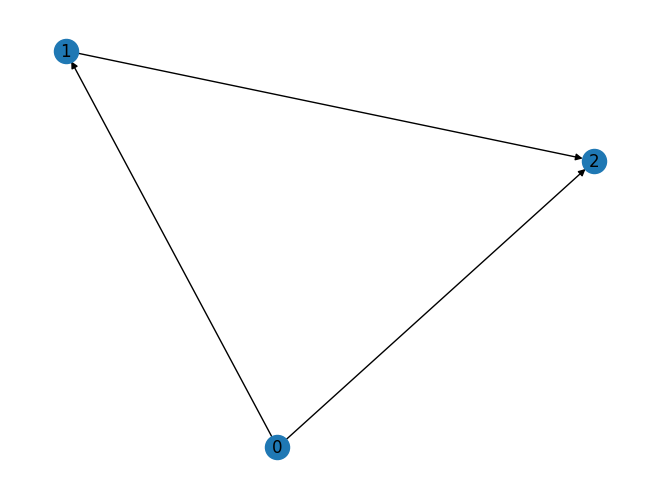

Space counts: [0, 0, 2]
0 0
1 0
2 2
Qubit 0 chosen
Space counts: [1, 0, 1]
0 1
1 0
2 1
Qubit 6 chosen
Space counts: [1, 1, 0]
0 1
1 1
Qubit 1 chosen
Space counts: [2, 0, 0]
0 2
1 0
2 0
Qubit None chosen
[{'qubit': 0, 'source': 0, 'destination': 2}, {'qubit': 6, 'source': 1, 'destination': 2}, {'qubit': 1, 'source': 0, 'destination': 1}]


In [270]:
print(assignment1)
print(assignment2)
teleportation_order = get_teleport_cycles(assignment1, assignment2, len(qpu_sizes), num_qubits)

print(teleportation_order)